In [185]:
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt

df = pd.read_csv("./results/1.0/mm_complete_1.0.csv")
pd.options.display.max_rows = 999
confs = list(df['conf'].values)
unq_m = df['m'].unique()
n_confs = int(df.shape[0] / len(unq_m))
df

,Unnamed: 0,conf,m,use_trace,in0_sharded,out_sharded,in0_storage_type,in1_storage_type,out_storage_type,dtype,...,transfer_time_in0,transfer_time_in1,kernel_config_time,first_run_time,second_run_time,compile_time,inference_time_avg,TFLOPs (avg),Utilization (vs user grid),Utilization (vs 8x8 full grid)
0,0,f16_m2,256,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,...,7054.76,6531.56,57.39,158181.11,371.64,157809.47,257.33,0.13,0.10%,0.07%
1,1,f16_m2,512,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,...,25440.96,24308.20,59.77,160608.24,365.43,160242.81,244.19,1.10,0.84%,0.61%
2,2,f16_m2,1024,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,...,97830.64,95796.93,62.99,162242.12,385.12,161857.00,243.73,8.81,6.72%,4.89%
3,3,f16_m2,2048,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,...,395579.62,397300.06,82.22,184993.31,708.64,184284.67,399.80,42.97,32.78%,23.84%
4,4,f16_m2,3072,False,False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,...,862264.18,868134.05,59.54,178257.73,2184.18,176073.55,1990.74,29.13,22.22%,16.16%
5,5,f16_m2,4096,False,False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,...,1547072.15,1533871.07,62.46,190421.52,4418.33,186003.19,4383.52,31.35,23.92%,17.40%
6,6,f16_m2,8192,False,False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,...,6231834.34,6160305.34,64.91,209736.86,28122.78,181614.08,29435.45,37.35,28.50%,20.73%
7,7,f16_m4,256,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,...,7181.36,6397.51,56.29,81254.78,394.43,80860.35,243.64,0.14,0.21%,0.15%
8,8,f16_m4,512,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,...,25498.42,24252.34,61.27,82773.48,383.38,82390.10,244.95,1.10,1.67%,1.22%
9,9,f16_m4,1024,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,...,97682.81,95554.61,63.25,83099.42,381.37,82718.05,248.80,8.63,13.17%,9.58%


In [136]:
conf_infos = dict()
infs = ['use_trace', 'in0_sharded', 'out_sharded', 'in0_storage_type',
       'in1_storage_type', 'out_storage_type', 'dtype', 'math_fidelity',]
for conf in confs:
    conf_infos[conf] = dict()
    val0 = df.loc[df['conf'] == conf]
    for inf in infs:
        conf_infos[conf][inf] = val0[inf].values[0]
conf_infos

{'f16_m2': {'use_trace': False,
  'in0_sharded': True,
  'out_sharded': True,
  'in0_storage_type': 'L1',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'L1',
  'dtype': 'DataType.BFLOAT16',
  'math_fidelity': 'MathFidelity.HiFi2'},
 'f16_m4': {'use_trace': False,
  'in0_sharded': True,
  'out_sharded': True,
  'in0_storage_type': 'L1',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'L1',
  'dtype': 'DataType.BFLOAT16',
  'math_fidelity': 'MathFidelity.HiFi4'},
 'f8b_m2': {'use_trace': False,
  'in0_sharded': True,
  'out_sharded': True,
  'in0_storage_type': 'L1',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'L1',
  'dtype': 'DataType.BFLOAT8_B',
  'math_fidelity': 'MathFidelity.HiFi2'},
 'f8b_m0': {'use_trace': False,
  'in0_sharded': True,
  'out_sharded': True,
  'in0_storage_type': 'L1',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'L1',
  'dtype': 'DataType.BFLOAT8_B',
  'math_fidelity': 'MathFidelity.LoFi'},
 'f4b_m0': {'use_trace': False,
  'in0_sharded'

In [95]:
def get_column_df_info(df_inf, d_name, c_name = 'conf', mean=False):
    data = dict()
    c_list = df_inf[c_name].unique()

    for c in c_list:
        data[c] = list()

        for m in unq_m:
            val0 = df_inf.loc[(df_inf['m'] == m) & (df_inf[c_name] == c)][d_name].values
            if mean:
                val0 = val0.mean()
            else:
                val0 = val0[0]
            data[c].append(val0)

    df_c = pd.DataFrame.from_dict(data)
    df_c.set_index(unq_m, inplace=True)
    return df_c

## Transfer time

In [137]:
df_transf0 = get_column_df_info(df, 'transfer_time_in0', mean=True)
df_transf1 = get_column_df_info(df, 'transfer_time_in1', mean=True)

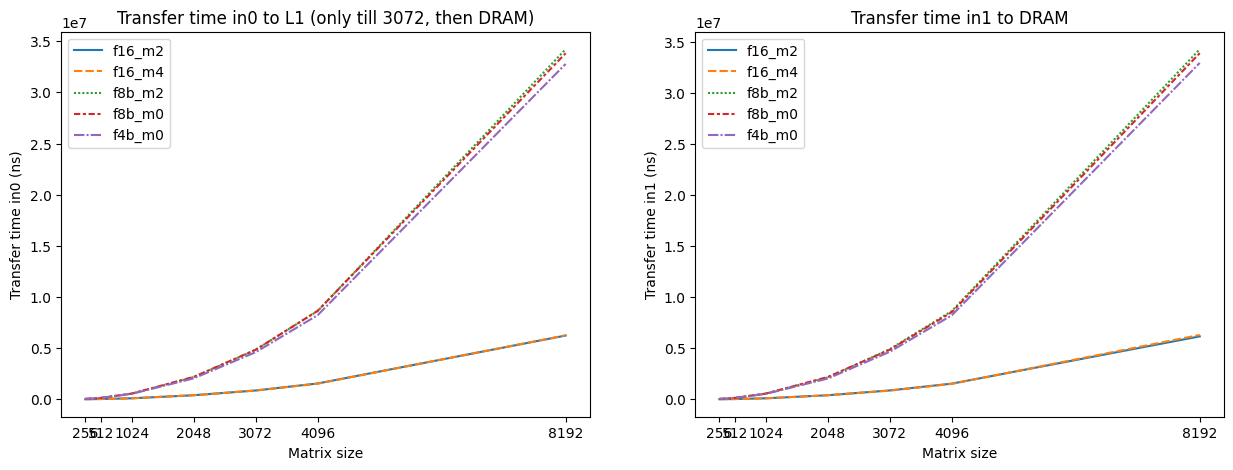

In [138]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
plot = sns.lineplot(df_transf0, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Transfer time in0 (ns)")
plot.set_title("Transfer time in0 to L1 (only till 3072, then DRAM)")

plot = sns.lineplot(df_transf1, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Transfer time in1 (ns)")

plot.set_title("Transfer time in1 to DRAM")

plt.show()


In [139]:
df_transf0_dtype = get_column_df_info(df, 'transfer_time_in0', c_name="dtype", mean=True)
df_transf1_dtype = get_column_df_info(df, 'transfer_time_in1', c_name="dtype", mean=True)

In [140]:
df_transf0_dtype

,DataType.BFLOAT16,DataType.BFLOAT8_B,DataType.BFLOAT4_B
256,7118.060,3.948449e+04,34493.91
512,25469.690,1.384233e+05,129186.30
1024,97756.725,5.596983e+05,535862.21
2048,399103.080,2.178998e+06,2046934.48
3072,858381.990,4.847460e+06,4610045.56
4096,1538130.320,8.643542e+06,8228607.97
8192,6242347.110,3.402092e+07,32781887.76


In [141]:
df_transf1_dtype

,DataType.BFLOAT16,DataType.BFLOAT8_B,DataType.BFLOAT4_B
256,6464.535,3.621098e+04,33523.69
512,24280.270,1.384217e+05,128451.96
1024,95675.770,5.600368e+05,532329.69
2048,395613.210,2.161961e+06,2033046.69
3072,859573.955,4.883838e+06,4658945.78
4096,1521139.680,8.589695e+06,8228733.30
8192,6230972.065,3.408694e+07,32938523.50


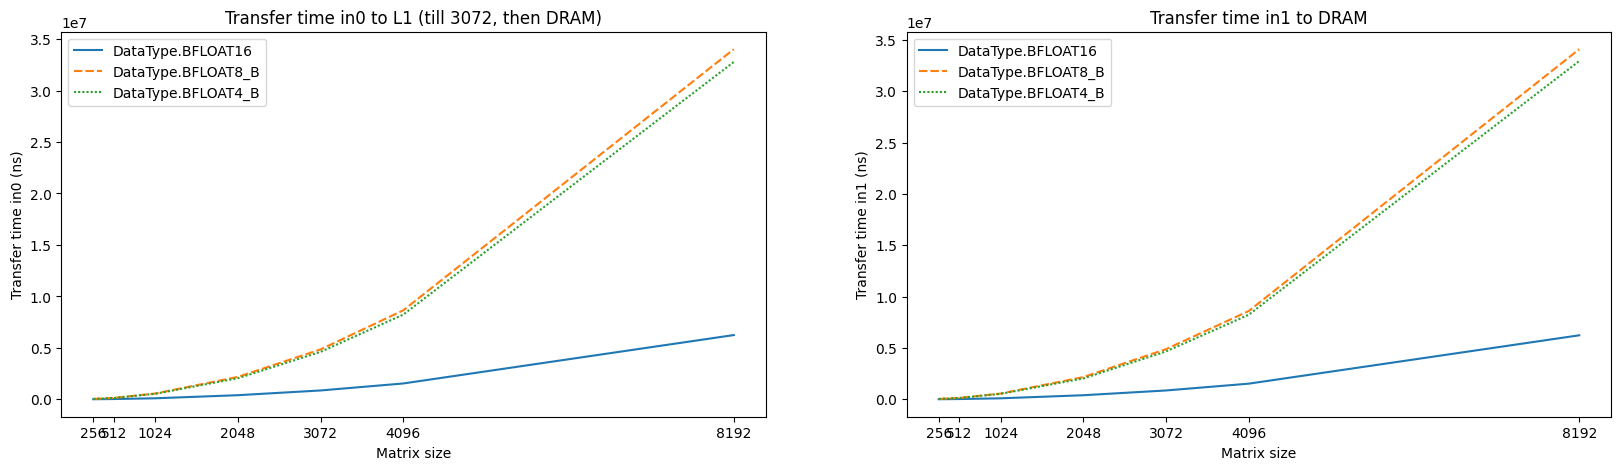

In [142]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
plot = sns.lineplot(df_transf0_dtype, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Transfer time in0 (ns)")
plot.set_title("Transfer time in0 to L1 (till 3072, then DRAM)")

plot = sns.lineplot(df_transf1_dtype, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Transfer time in1 (ns)")

plot.set_title("Transfer time in1 to DRAM")

plt.show()


### Calculate Mb/s transfer

In [143]:
df_transf_norm_b = pd.DataFrame()
elements = df_transf0_dtype.index * df_transf0_dtype.index

df_transf_norm_b['DataType.BFLOAT16'] = (16 * elements) / df_transf0_dtype['DataType.BFLOAT16'] 
df_transf_norm_b['DataType.BFLOAT8_B'] = (8 * elements + (elements)//16) / df_transf0_dtype['DataType.BFLOAT8_B']
df_transf_norm_b['DataType.BFLOAT4_B'] = (4 * elements + (elements)//16) / df_transf0_dtype['DataType.BFLOAT4_B']

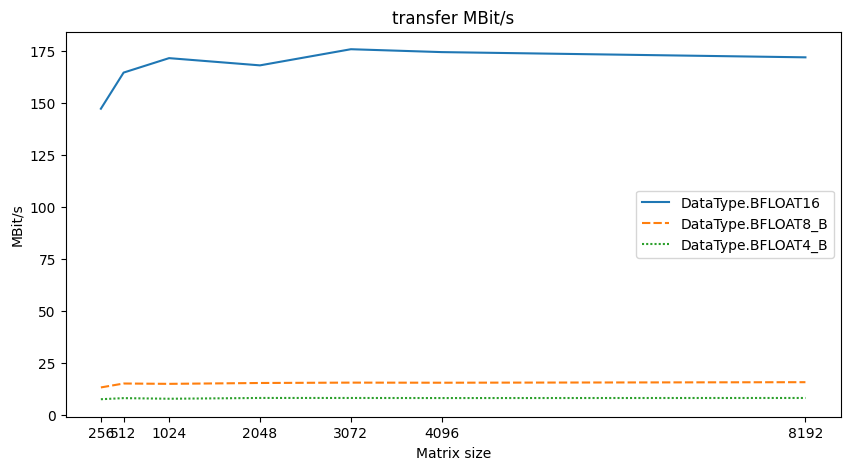

In [144]:
fig, ax = plt.subplots(figsize=(10,5))
plot = sns.lineplot(df_transf_norm_b, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("MBit/s")
plot.set_title("transfer MBit/s")

plt.show()

### Normalize by bytes

In [145]:
df_transf_norm_b = pd.DataFrame()
df_transf_norm_b['DataType.BFLOAT16'] = df_transf0_dtype['DataType.BFLOAT16'] / (16 * elements)
df_transf_norm_b['DataType.BFLOAT8_B'] = df_transf0_dtype['DataType.BFLOAT8_B'] / (8 * elements + (elements)//16)
df_transf_norm_b['DataType.BFLOAT4_B'] = df_transf0_dtype['DataType.BFLOAT4_B'] / (4 * elements + (elements)//16)

In [146]:
df_transf_norm_b

,DataType.BFLOAT16,DataType.BFLOAT8_B,DataType.BFLOAT4_B
256,0.006788,0.074727,0.129559
512,0.006072,0.065494,0.121306
1024,0.005827,0.066204,0.125794
2048,0.005947,0.064436,0.120130
3072,0.005685,0.063709,0.120246
4096,0.005730,0.063900,0.120729
8192,0.005814,0.062878,0.120243


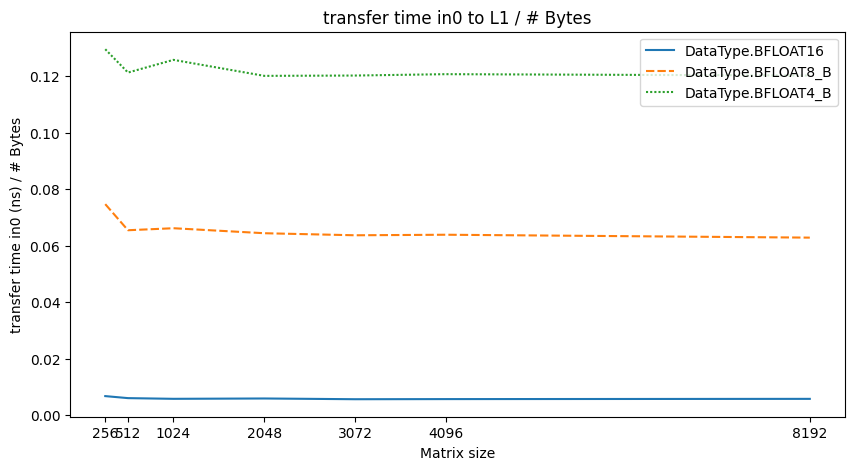

In [147]:
fig, ax = plt.subplots(figsize=(10,5))
plot = sns.lineplot(df_transf_norm_b, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("transfer time in0 (ns) / # Bytes")
plot.set_title("transfer time in0 to L1 / # Bytes")

plt.show()

## Compile time

In [148]:
df_compile = get_column_df_info(df, 'compile_time')
df_compile

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0
256,157809.47,80860.35,104324.67,81145.16,157589.06
512,160242.81,82390.10,103874.79,83826.13,162613.58
1024,161857.00,82718.05,116022.33,93210.94,145867.23
2048,184284.67,95577.20,169829.19,90592.75,166598.67
3072,176073.55,85558.75,172414.76,85858.16,173368.63
4096,186003.19,92600.43,181337.20,89990.37,172481.08
8192,181614.08,88745.72,179254.80,88900.45,183387.70


To be cleared

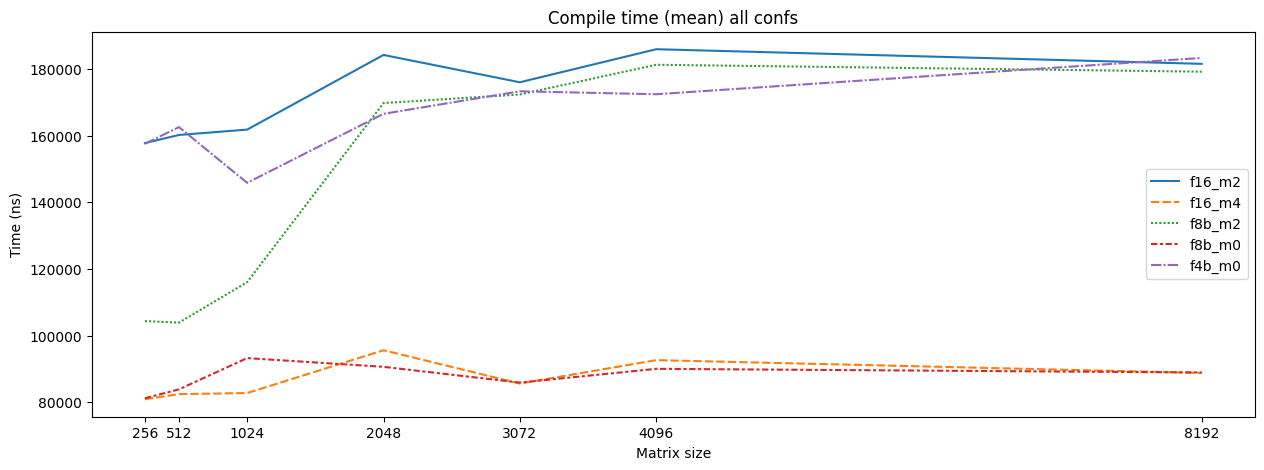

In [149]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_compile, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (ns)")
plot.set_title("Compile time (mean) all confs")

plt.show()

## Inference

In [150]:
df_sr = get_column_df_info(df, "second_run_time")
df_sr

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0
256,371.64,394.43,404.97,392.37,368.28
512,365.43,383.38,401.69,388.03,386.07
1024,385.12,381.37,408.64,387.87,391.24
2048,708.64,951.42,646.69,510.21,491.44
3072,2184.18,3006.56,1742.00,1226.15,1070.57
4096,4418.33,6321.32,3487.85,2379.95,1971.32
8192,28122.78,43745.43,23680.48,14488.21,12485.36


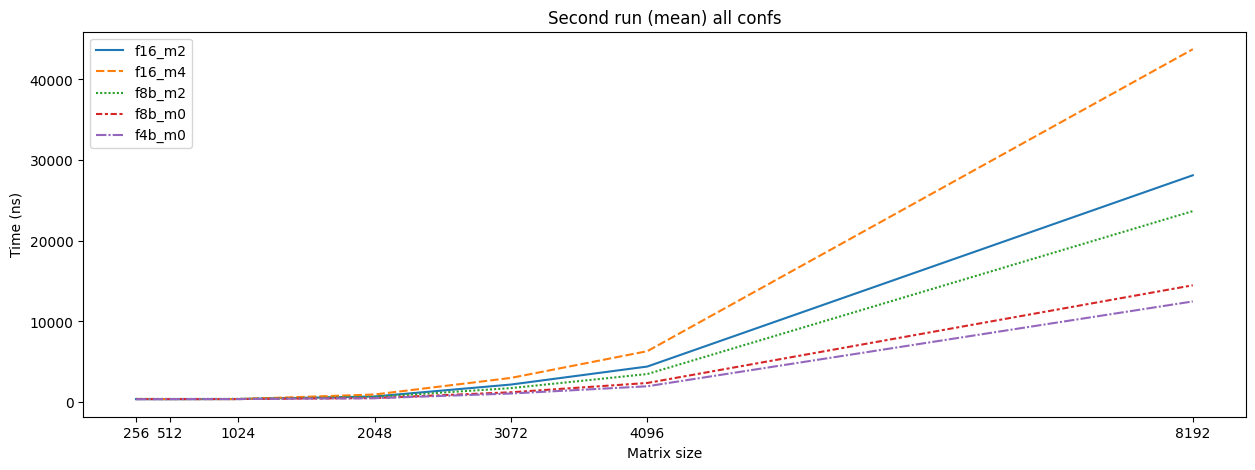

In [151]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_sr, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (ns)")
plot.set_title("Second run (mean) all confs")

plt.show()

In [152]:
df_avg = get_column_df_info(df, 'inference_time_avg')
df_avg

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0
256,257.33,243.64,246.66,247.37,246.83
512,244.19,244.95,252.00,251.83,246.46
1024,243.73,248.80,250.38,250.54,259.20
2048,399.80,674.03,359.18,250.40,247.24
3072,1990.74,2877.01,1510.97,989.06,820.91
4096,4383.52,6364.27,3385.24,2233.29,1773.07
8192,29435.45,45940.03,24773.45,15113.17,12931.69


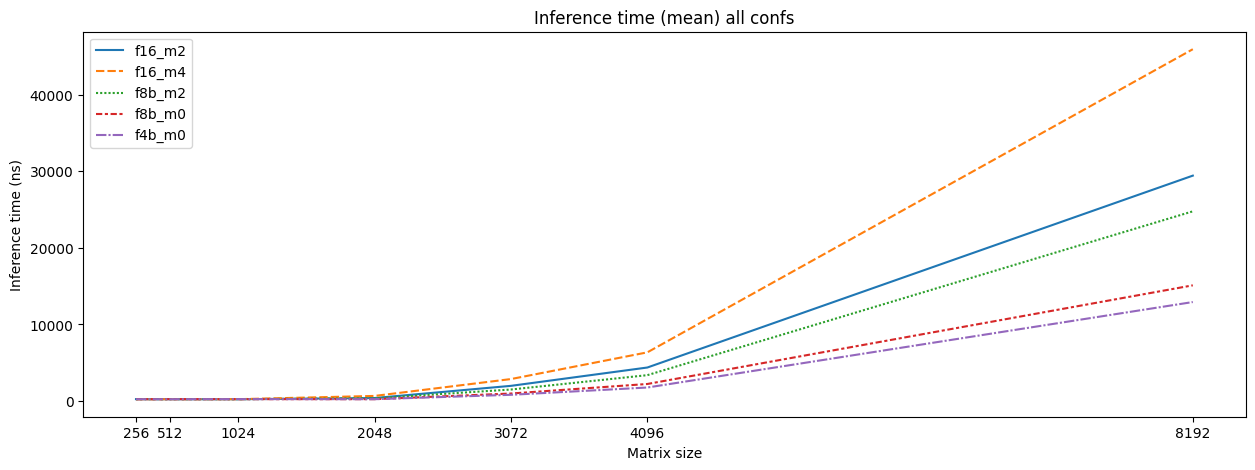

In [153]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_avg, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (ns)")
plot.set_title("Inference time (mean) all confs")

plt.show()

In [154]:
df_avg_dtype = get_column_df_info(df, 'inference_time_avg', c_name='dtype', mean=True)
df_avg_dtype

,DataType.BFLOAT16,DataType.BFLOAT8_B,DataType.BFLOAT4_B
256,250.485,247.015,246.83
512,244.570,251.915,246.46
1024,246.265,250.460,259.20
2048,536.915,304.790,247.24
3072,2433.875,1250.015,820.91
4096,5373.895,2809.265,1773.07
8192,37687.740,19943.310,12931.69


In [155]:
df_avg_math_fidelity = get_column_df_info(df, 'inference_time_avg', c_name='math_fidelity', mean=True)
df_avg_math_fidelity

,MathFidelity.HiFi2,MathFidelity.HiFi4,MathFidelity.LoFi
256,251.995,243.64,247.100
512,248.095,244.95,249.145
1024,247.055,248.80,254.870
2048,379.490,674.03,248.820
3072,1750.855,2877.01,904.985
4096,3884.380,6364.27,2003.180
8192,27104.450,45940.03,14022.430


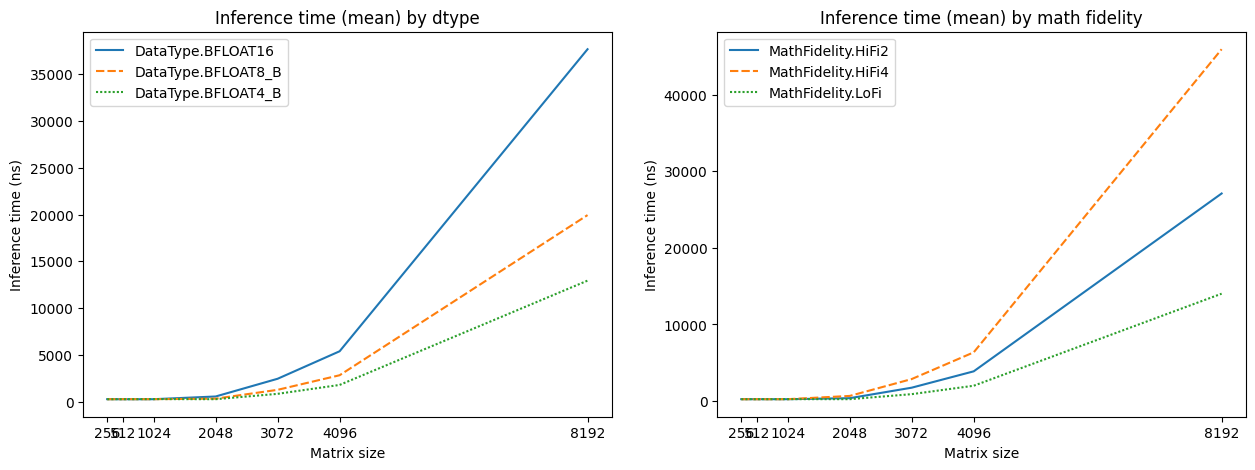

In [156]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

plot = sns.lineplot(df_avg_dtype, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (ns)")
plot.set_title("Inference time (mean) by dtype")

plot = sns.lineplot(df_avg_math_fidelity, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (ns)")
plot.set_title("Inference time (mean) by math fidelity")

plt.show()


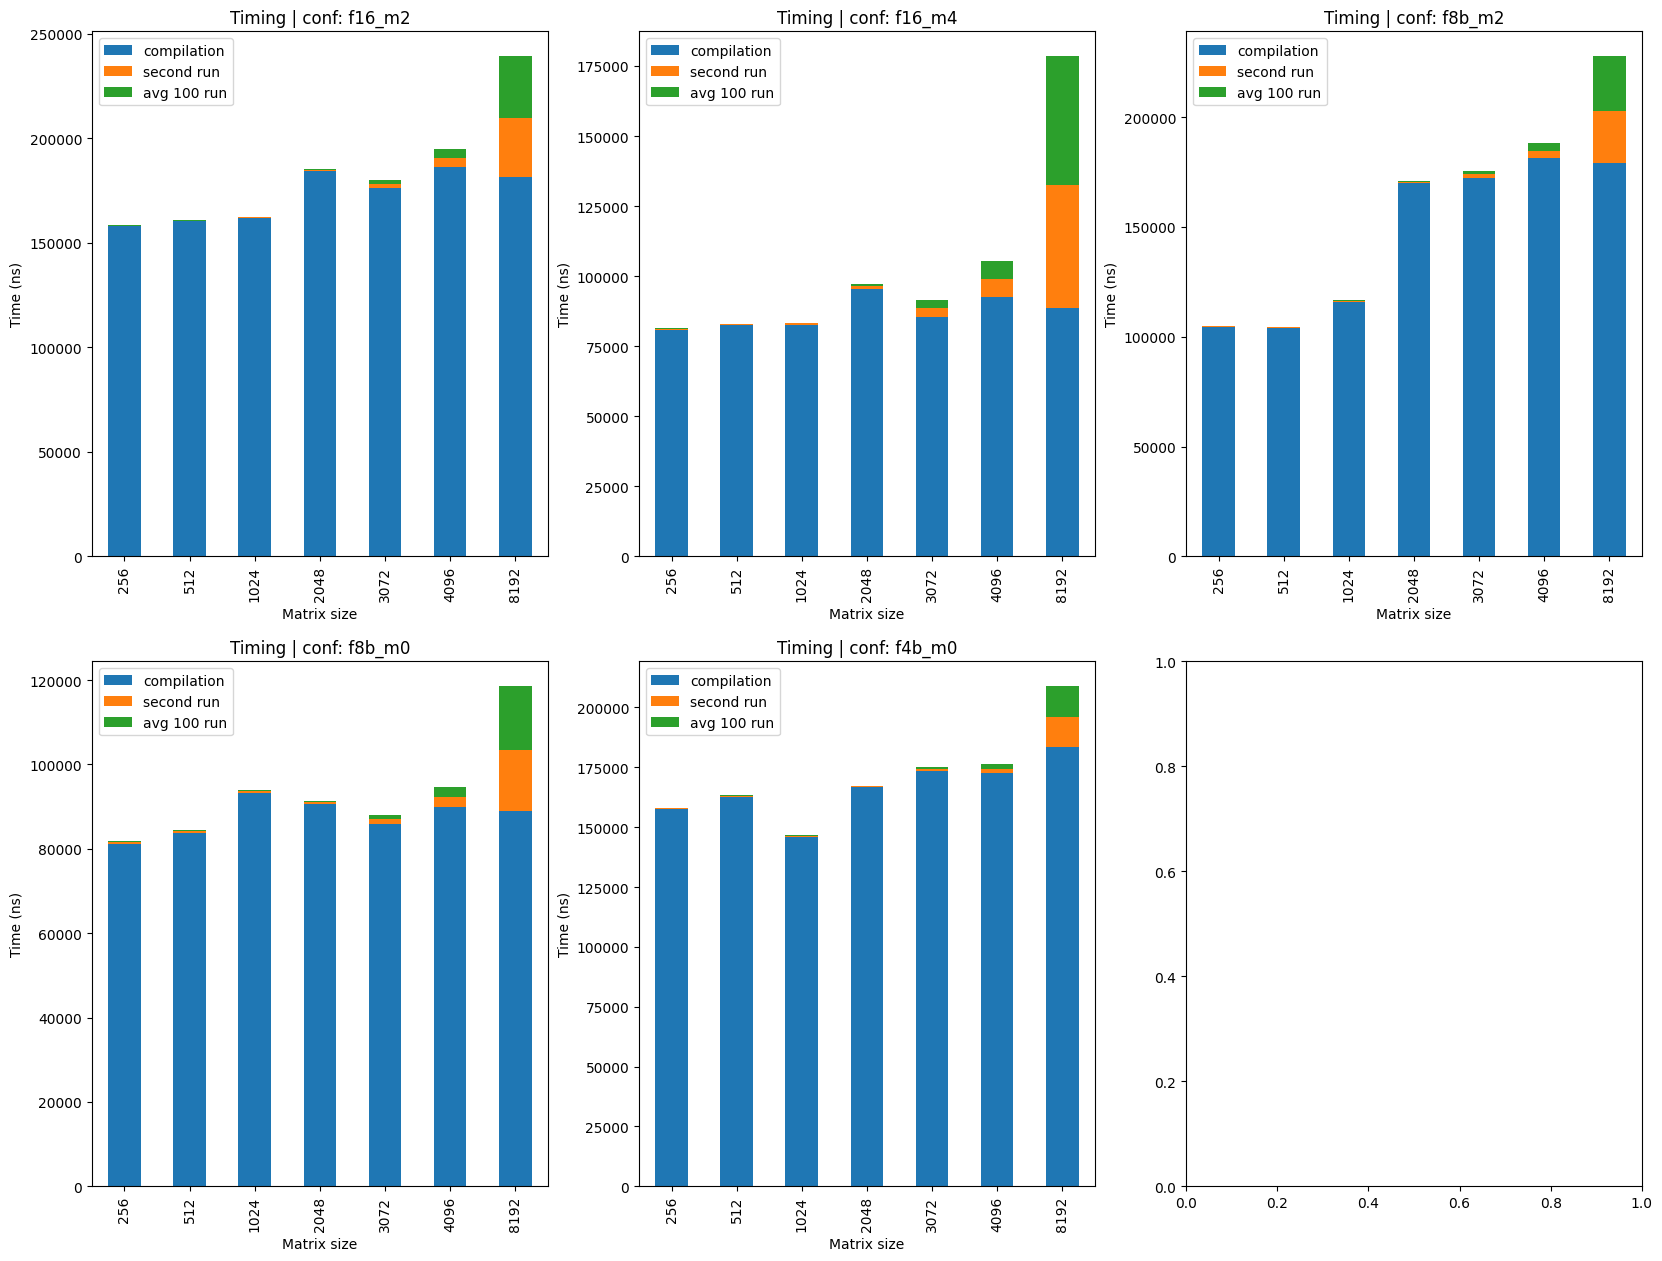

In [158]:
fig, axs = plt.subplots(2,3, figsize=(20,15))
i, j = 0, 0
for conf in df_avg.columns:
    df_combined = pd.concat([df_compile[conf], df_sr[conf], df_avg[conf]], axis=1)
    df_combined.columns = ["compilation", "second run", "avg 100 run"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[i][j])
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (ns)')
plt.show()

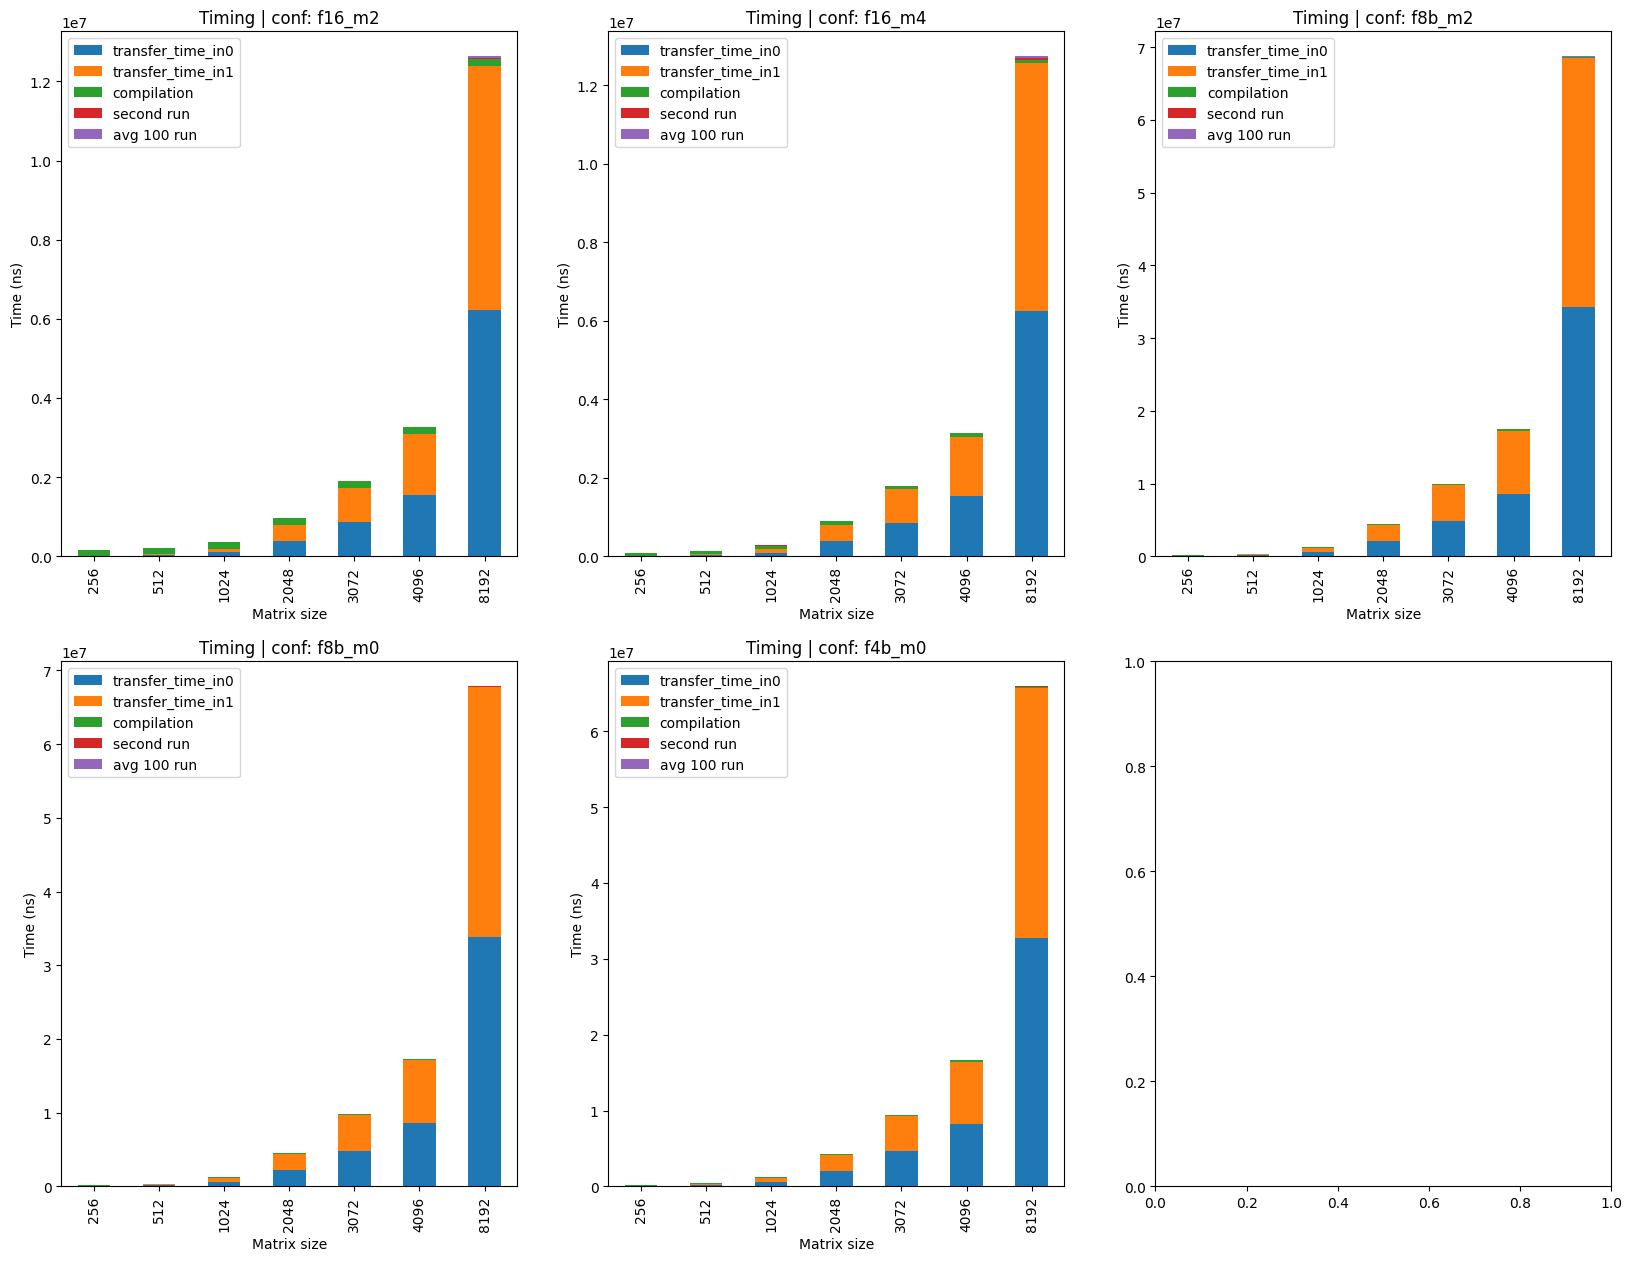

In [163]:
fig, axs = plt.subplots(2,3, figsize=(20,15))
i, j = 0, 0
for conf in df_avg.columns:
    df_combined = pd.concat([df_transf0[conf], df_transf1[conf], df_compile[conf], df_sr[conf], df_avg[conf]], axis=1)
    df_combined.columns = ["transfer_time_in0", "transfer_time_in1", "compilation", "second run", "avg 100 run"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[i][j])
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (ns)')
plt.show()

### Torch comparison 

#### Torch bf16

In [164]:
df_torch = pd.concat([pd.read_csv("./results/torch_bfp16.csv", index_col="m"), pd.read_csv("./results/torch_fp32.csv", index_col="m")], axis=1)
df_compare_conf_torch = pd.concat([df_avg, df_torch], axis=1)
df_compare_conf_torch

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0,torch_bfp16,torch_fp32
256,257.33,243.64,246.66,247.37,246.83,8.491991e+03,8.206129e+01
512,244.19,244.95,252.00,251.83,246.46,1.669232e+05,4.992867e+02
1024,243.73,248.80,250.38,250.54,259.20,1.433732e+06,3.081963e+03
2048,399.80,674.03,359.18,250.40,247.24,2.732600e+07,2.506427e+04
3072,1990.74,2877.01,1510.97,989.06,820.91,9.042670e+07,8.344136e+04
4096,4383.52,6364.27,3385.24,2233.29,1773.07,3.248094e+08,2.274305e+05
8192,29435.45,45940.03,24773.45,15113.17,12931.69,3.198951e+09,1.653865e+06


CPU Torch fp16 is out of scale (working single core)

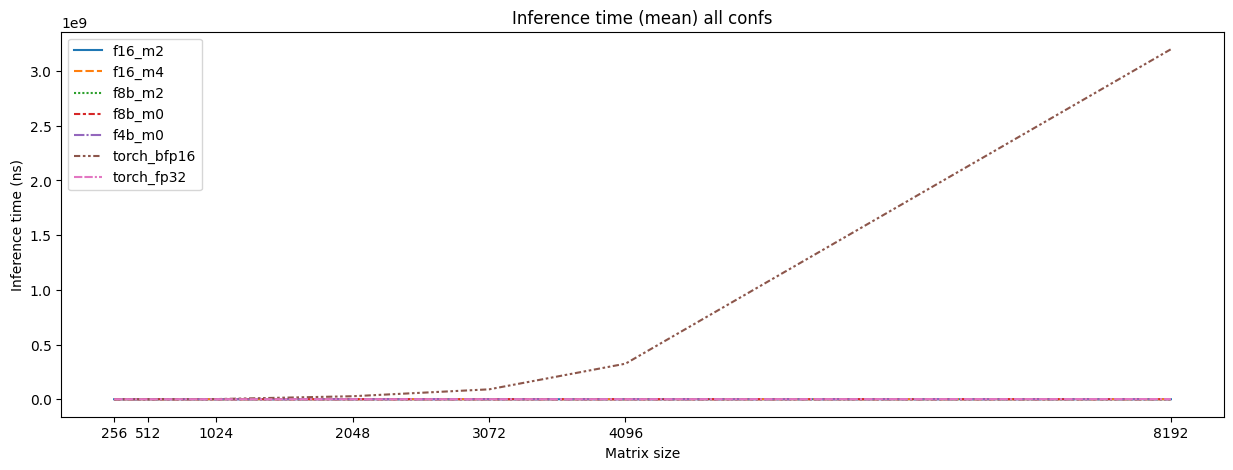

In [165]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_compare_conf_torch, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (ns)")
plot.set_title("Inference time (mean) all confs")

plt.show()

Smaller window and ignore fp16

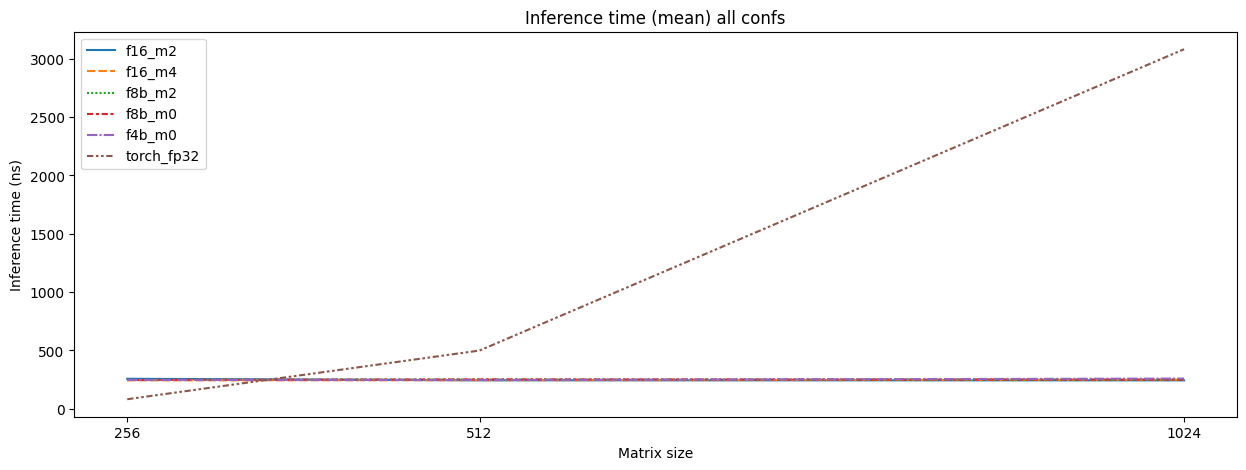

In [166]:
fig, ax = plt.subplots(figsize=(15,5))
window = 3

plot = sns.lineplot(df_compare_conf_torch.drop("torch_bfp16", axis=1).iloc[:window], ax=ax)
plot.set_xticks(unq_m[:window])
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (ns)")
plot.set_title("Inference time (mean) all confs")

plt.show()

##### Torch comparison including transfer time

In [170]:
df_compare_conf_torch_tot = pd.concat([df_transf0 + df_transf1 + df_avg + df_compile, df_torch], axis=1)
df_compare_conf_torch_tot

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0,torch_bfp16,torch_fp32
256,171653.12,94682.86,180106.64,157248.16,225853.49,8.491991e+03,8.206129e+01
512,210236.16,132385.81,386168.81,355725.86,420498.30,1.669232e+05,4.992867e+02
1024,355728.30,276204.27,1238574.82,1210629.52,1214318.33,1.433732e+06,3.081963e+03
2048,977564.15,892804.13,4472441.48,4470508.61,4246827.08,2.732600e+07,2.506427e+04
3072,1908462.52,1793949.42,9930297.88,9793072.02,9443180.88,9.042670e+07,8.344136e+04
4096,3271329.93,3136561.48,17463022.54,17280398.19,16631595.42,3.248094e+08,2.274305e+05
8192,12603189.21,12689184.42,68701494.66,67822272.78,65916730.65,3.198951e+09,1.653865e+06


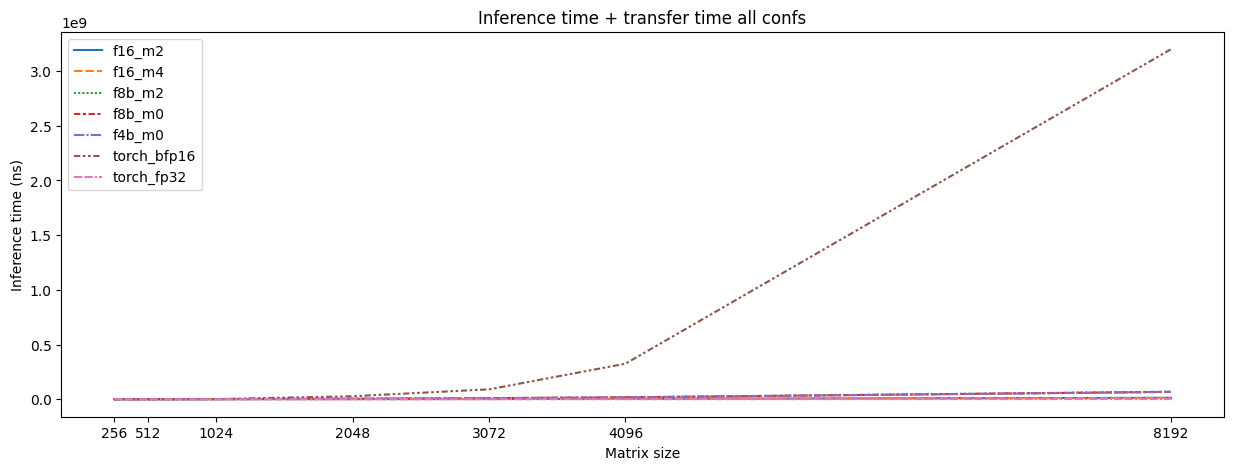

In [171]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_compare_conf_torch_tot, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (ns)")
plot.set_title("Inference time + transfer time all confs")

plt.show()

Smaller window

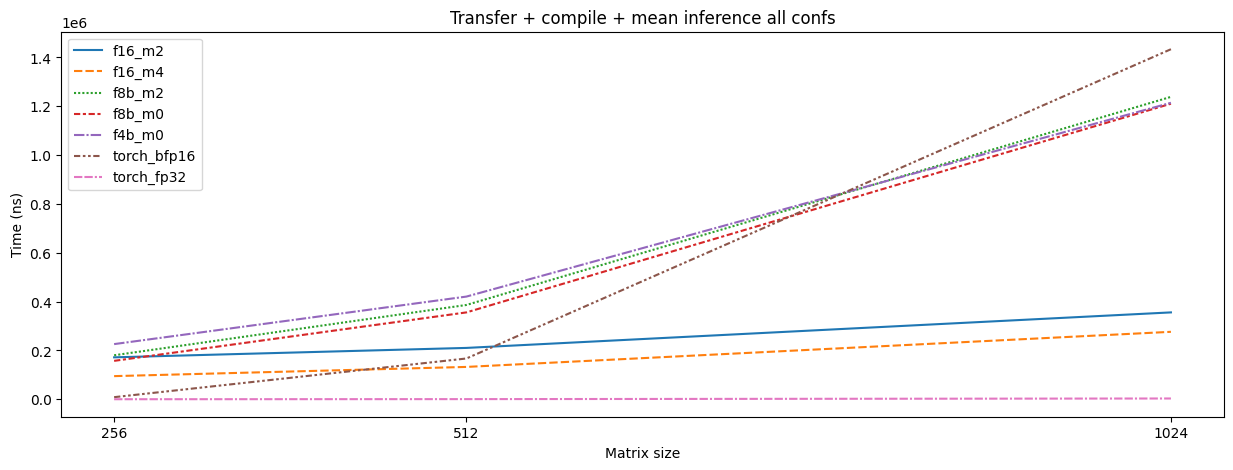

In [173]:
fig, ax = plt.subplots(figsize=(15,5))

window = 3
plot = sns.lineplot(df_compare_conf_torch_tot.iloc[:window], ax=ax)
plot.set_xticks(unq_m[:window])
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (ns)")
plot.set_title("Transfer + compile + mean inference all confs")

plt.show()

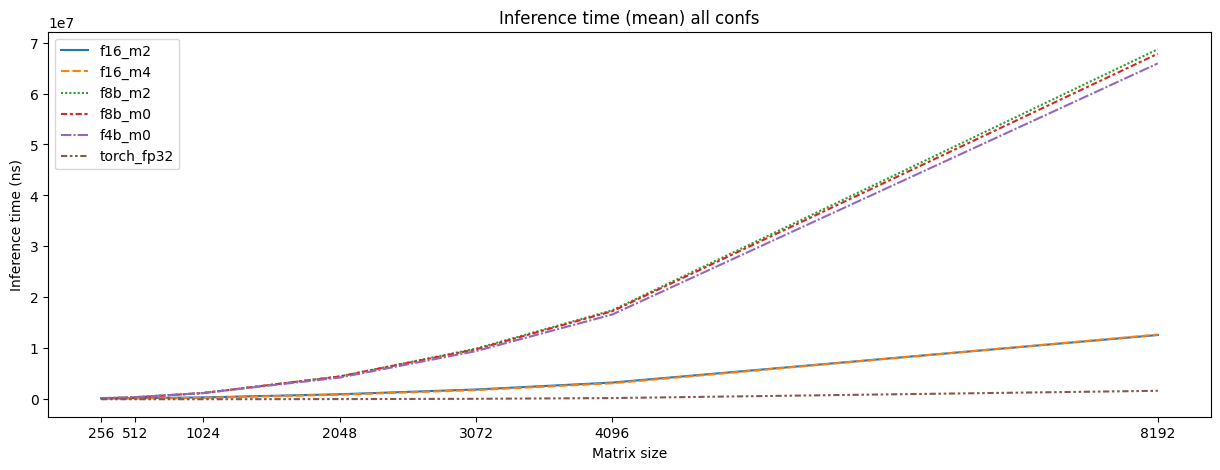

In [174]:
fig, ax = plt.subplots(figsize=(15,5))

window = 9
plot = sns.lineplot(df_compare_conf_torch_tot.drop("torch_bfp16", axis=1).iloc[:window], ax=ax)
plot.set_xticks(unq_m[:window])
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (ns)")
plot.set_title("Inference time (mean) all confs")

plt.show()

## Acceleration vs CPU

$
CPU_t = \mathcal{N} \text{matmul}_{CPU}\\
TT_t = \text{transfer}_t + \text{compilation}_t + \mathcal{N} \text{matmul}_{TT} \\
$

To obtain $TT_t < CPU_t$, we need to size N: 

$
    \text{transfer}_t + \text{compilation}_t < (\text{matmul}_{CPU} - \text{matmul}_{TT})\mathcal{N}\\
    \mathcal{N} > \frac{\text{transfer}_t + \text{compilation}_t}{\text{matmul}_{CPU} - \text{matmul}_{TT}}
$

In [175]:
df_overhead = (df_transf0 + df_transf1 + df_compile)
df_overhead

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0
256,171395.79,94439.22,179859.98,157000.79,225606.66
512,209991.97,132140.86,385916.81,355474.03,420251.84
1024,355484.57,275955.47,1238324.44,1210378.98,1214059.13
2048,977164.35,892130.10,4472082.30,4470258.21,4246579.84
3072,1906471.78,1791072.41,9928786.91,9792082.96,9442359.97
4096,3266946.41,3130197.21,17459637.30,17278164.90,16629822.35
8192,12573753.76,12643244.39,68676721.21,67807159.61,65903798.96


In [181]:
df_accl = ((- df_avg).add(df_torch['torch_fp32'], axis=0))
df_accl

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0
256,-1.752687e+02,-1.615787e+02,-1.645987e+02,-1.653087e+02,-1.647687e+02
512,2.550967e+02,2.543367e+02,2.472867e+02,2.474567e+02,2.528267e+02
1024,2.838233e+03,2.833163e+03,2.831583e+03,2.831423e+03,2.822763e+03
2048,2.466447e+04,2.439024e+04,2.470509e+04,2.481387e+04,2.481703e+04
3072,8.145062e+04,8.056435e+04,8.193039e+04,8.245230e+04,8.262045e+04
4096,2.230470e+05,2.210662e+05,2.240453e+05,2.251972e+05,2.256574e+05
8192,1.624430e+06,1.607925e+06,1.629092e+06,1.638752e+06,1.640933e+06


In [182]:
df_N_accl = df_overhead / df_accl
df_N_accl

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0
256,-977.902962,-584.478119,-1092.718046,-949.743003,-1369.232429
512,823.185913,519.550993,1560.605101,1436.510305,1662.213368
1024,125.248548,97.401902,437.325840,427.480794,430.096010
2048,39.618302,36.577343,181.018674,180.151607,171.115567
3072,23.406474,22.231576,121.185646,118.760583,114.285994
4096,14.646898,14.159545,77.929063,76.724595,73.694991
8192,7.740412,7.863081,42.156453,41.377321,40.162388


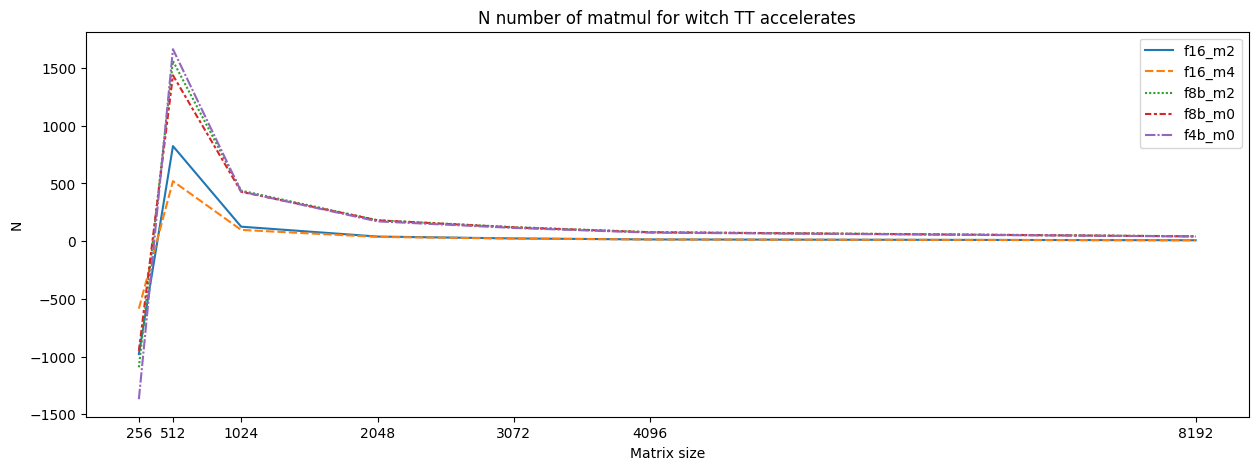

In [183]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_N_accl, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("N")
plot.set_title("N number of matmul for witch TT accelerates")

plt.show()